In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
data_low_freq=pd.read_csv("id_with_0_freq.csv",on_bad_lines="skip")

In [3]:
data_low_freq.head(10)
#data_high_freq=data_high_freq[data_high_freq['RECHARGE_AMOUNT']!=0].reset_index()

,AREA,BRAND,CELL,DATAREV_ALL_BUNDLE,DATAREV_MIXBUNDLE,DATAREV_PAYG,DATAREV_RET,DATAREV_SC,DATAREV_SELF,DATAREV_TOTAL,...,VOICEREV_RET,VOICEREV_SC,VOICEREV_SELF,VOICEREV_TOTAL,VOICEREV_TRIG,VOICEREV_USG,VOICE_RG_DAYS,VOL_KB,VOL_KB_3MNTH,VOL_KB_ALL
0,KISHOREGANJ CLUSTER,Oppo,9A09,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,1.38,0.0,1.38,1,0.00,2.033300e+03,2033.30
1,BARISHAL METRO CLUSTER,Lava,4B46,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,11.96,0.0,11.96,1,0.00,0.000000e+00,0.00
2,DINAJPUR OUTER CLUSTER,Itel,2E88,0.00,0.00,0.75,0.0,0.0,0.00,0.75,...,0.0,0.0,0.00,19.32,0.0,19.32,4,769.14,1.031100e+03,1031.10
3,MOHAMMADPUR CLUSTER,Alamin & Brothers,CED5,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,13.5,20.26,54.59,0.0,20.82,11,1.13,3.076000e+02,7.55
4,KHULNA OUTER CLUSTER,SB Tel,CD04,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,37.63,0.0,37.63,4,1.12,3.450000e+00,0.00
5,KALIHATI CLUSTER,Realme Mobile,99BD,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.00,0.0,0.00,0,0.00,9.200000e+01,7.46
6,SIRAJGANJ SADAR CLUSTER,SB Tel,CEF2,262.66,0.00,0.73,0.0,0.0,262.66,263.39,...,0.0,0.0,0.00,45.34,0.0,45.34,27,37298004.11,1.126233e+08,15522903.85
7,RAJSHAHI OUTER CLUSTER,Tecno Telecom,B0B8,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,23.06,0.0,23.06,4,0.00,1.613473e+04,34.94
8,NARAIL CLUSTER,Itel,9262,29.54,29.54,0.00,0.0,0.0,0.00,29.54,...,0.0,0.0,0.00,34.43,0.0,0.00,16,0.00,6.274030e+03,6274.03
9,GAZIPUR METRO CLUSTER,Samsung,1326,11.26,0.00,3.75,0.0,0.0,11.26,15.01,...,0.0,0.0,0.00,0.00,0.0,0.00,0,150531.35,3.017082e+05,3.64


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#transfer categorical features into numerical
data_low_freq['PRODUCT_TYPE']=data_low_freq['PRODUCT_TYPE'].apply(lambda x: 1 if x =='PRP' else 0)
data_low_freq[['PRICE_PLAN','HS_CONN','HS_TYPE','PRODUCT_TYPE']]=data_low_freq[['PRICE_PLAN','HS_CONN','HS_TYPE','PRODUCT_TYPE']].apply(le.fit_transform)

In [5]:
data_low_freq_k = data_low_freq[["TOTAL_DSTR","VOICEREV_TOTAL","DATAREV_TOTAL","SMSREV_TOTAL",
                                 "RG_DAYS",'PRICE_PLAN','HS_CONN','HS_TYPE', 'VOL_KB', 'MO_MOU']]

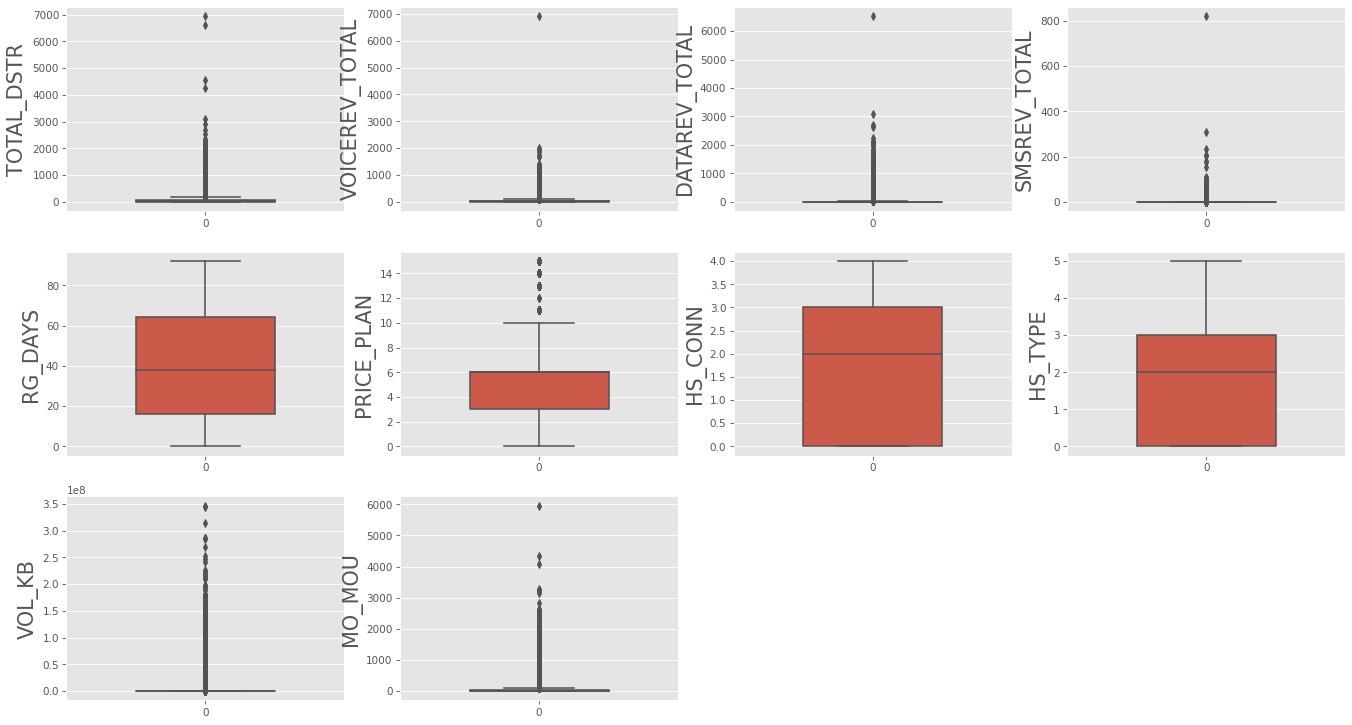

In [6]:
column = data_low_freq_k.columns.tolist() 
fig = plt.figure(figsize=(22, 12), dpi=75)  
for i in range(10):
    plt.subplot(3,4, i + 1)  
    sns.boxplot(data=data_low_freq_k[column[i]], orient="v",width=0.5)  
    plt.ylabel(column[i], fontsize=20)
plt.show()


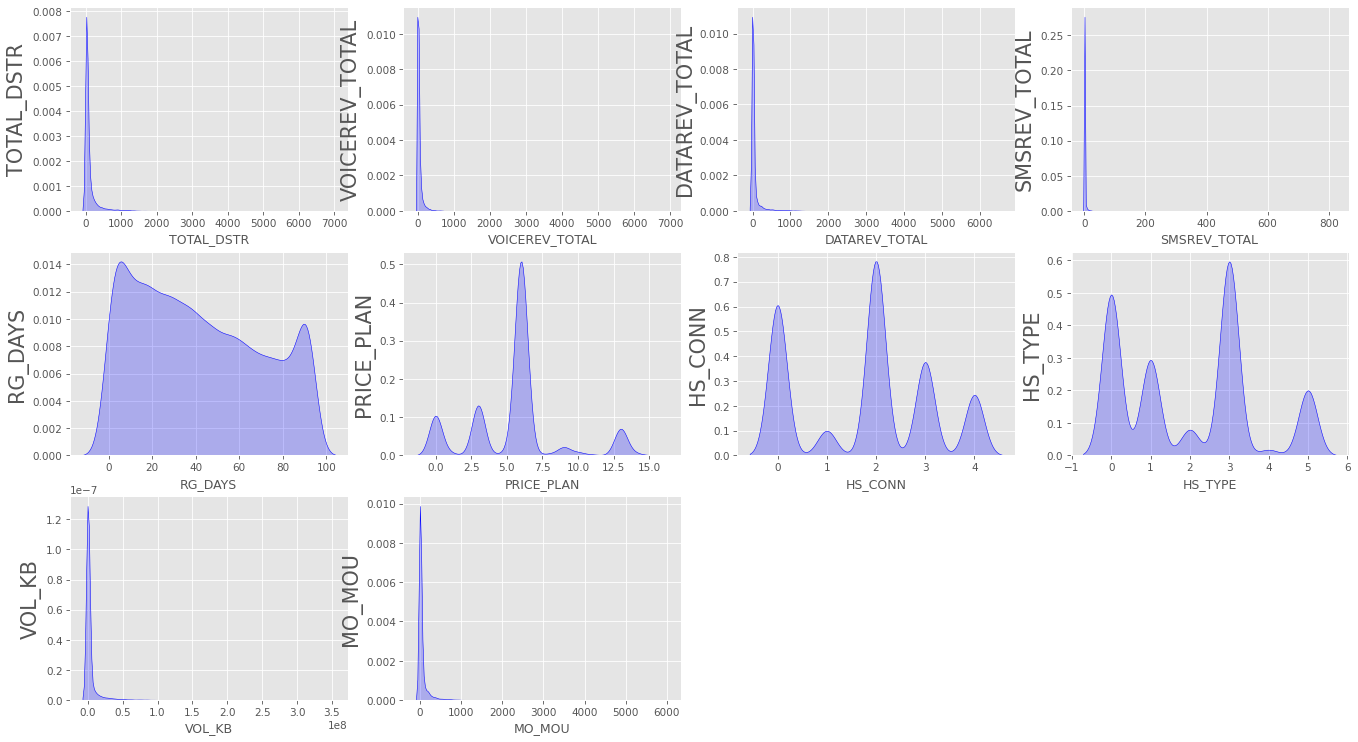

In [7]:

column = data_low_freq_k.columns.tolist()
fig = plt.figure(figsize=(22, 12), dpi=75)  
for i in range(10):
    plt.subplot(3,4, i + 1) 
    ax = sns.kdeplot(data=data_low_freq_k[column[i]],color='blue',shade= True)
    plt.ylabel(column[i], fontsize=20)
plt.show()


[178740.00000000006, 131816.6793160228, 110537.46366472726, 99334.27979853413, 89653.85450989884, 80655.28883564814, 72688.59285671945, 66898.0689290121, 62898.71199978121]


Text(0.5, 1.0, 'K-means Clustering')

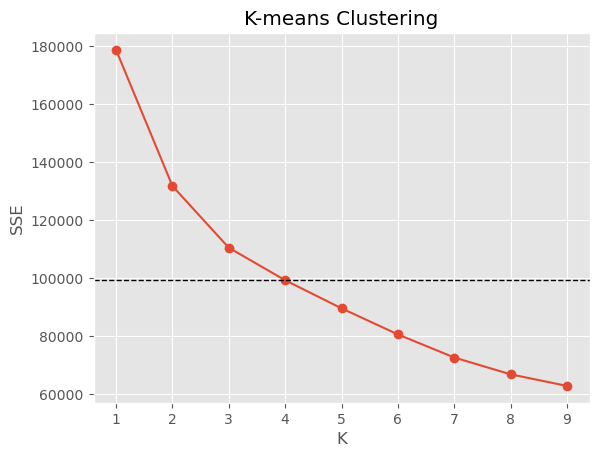

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_low_freq_k)
data_low_freq_stand = scaler.transform(data_low_freq_k)
# k-means clustering
from sklearn.cluster import KMeans
# find k
sse = []
for k in range(1,10):
    model = KMeans(n_clusters=k, random_state=123, n_init=20)
    model.fit(data_low_freq_stand)
    sse.append(model.inertia_)
print(sse)

plt.plot(range(1, 10), sse, 'o-')
plt.axhline(sse[3], color='k', linestyle='--', linewidth=1)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('K-means Clustering')
# seems like k = 3

In [9]:
kmeans_model = KMeans(n_clusters=4, random_state=123, n_init=20)
kmeans_model.fit(data_low_freq_stand)

kmeans_labels = kmeans_model.labels_   # labels of categories
pd.Series(kmeans_labels).value_counts()
data_low_freq_k["kind"]=pd.Series(kmeans_labels)
#data_high_freq_k.head()
data_low_freq_k.groupby('kind').count()

C:\Users\zhuhe\AppData\Local\Temp\ipykernel_13980\3638581594.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_low_freq_k["kind"]=pd.Series(kmeans_labels)


,TOTAL_DSTR,VOICEREV_TOTAL,DATAREV_TOTAL,SMSREV_TOTAL,RG_DAYS,PRICE_PLAN,HS_CONN,HS_TYPE,VOL_KB,MO_MOU
kind,,,,,,,,,,
0,5548,5548,5548,5548,5548,5548,5548,5548,5548,5548
1,11285,11285,11285,11285,11285,11285,11285,11285,11285,11285
2,572,572,572,572,572,572,572,572,572,572
3,469,469,469,469,469,469,469,469,469,469


In [10]:
data_low_freq_plot=pd.DataFrame(data_low_freq_stand,columns=data_low_freq_k.columns[:10])
data_low_freq_plot["kind"]=pd.Series(kmeans_labels)

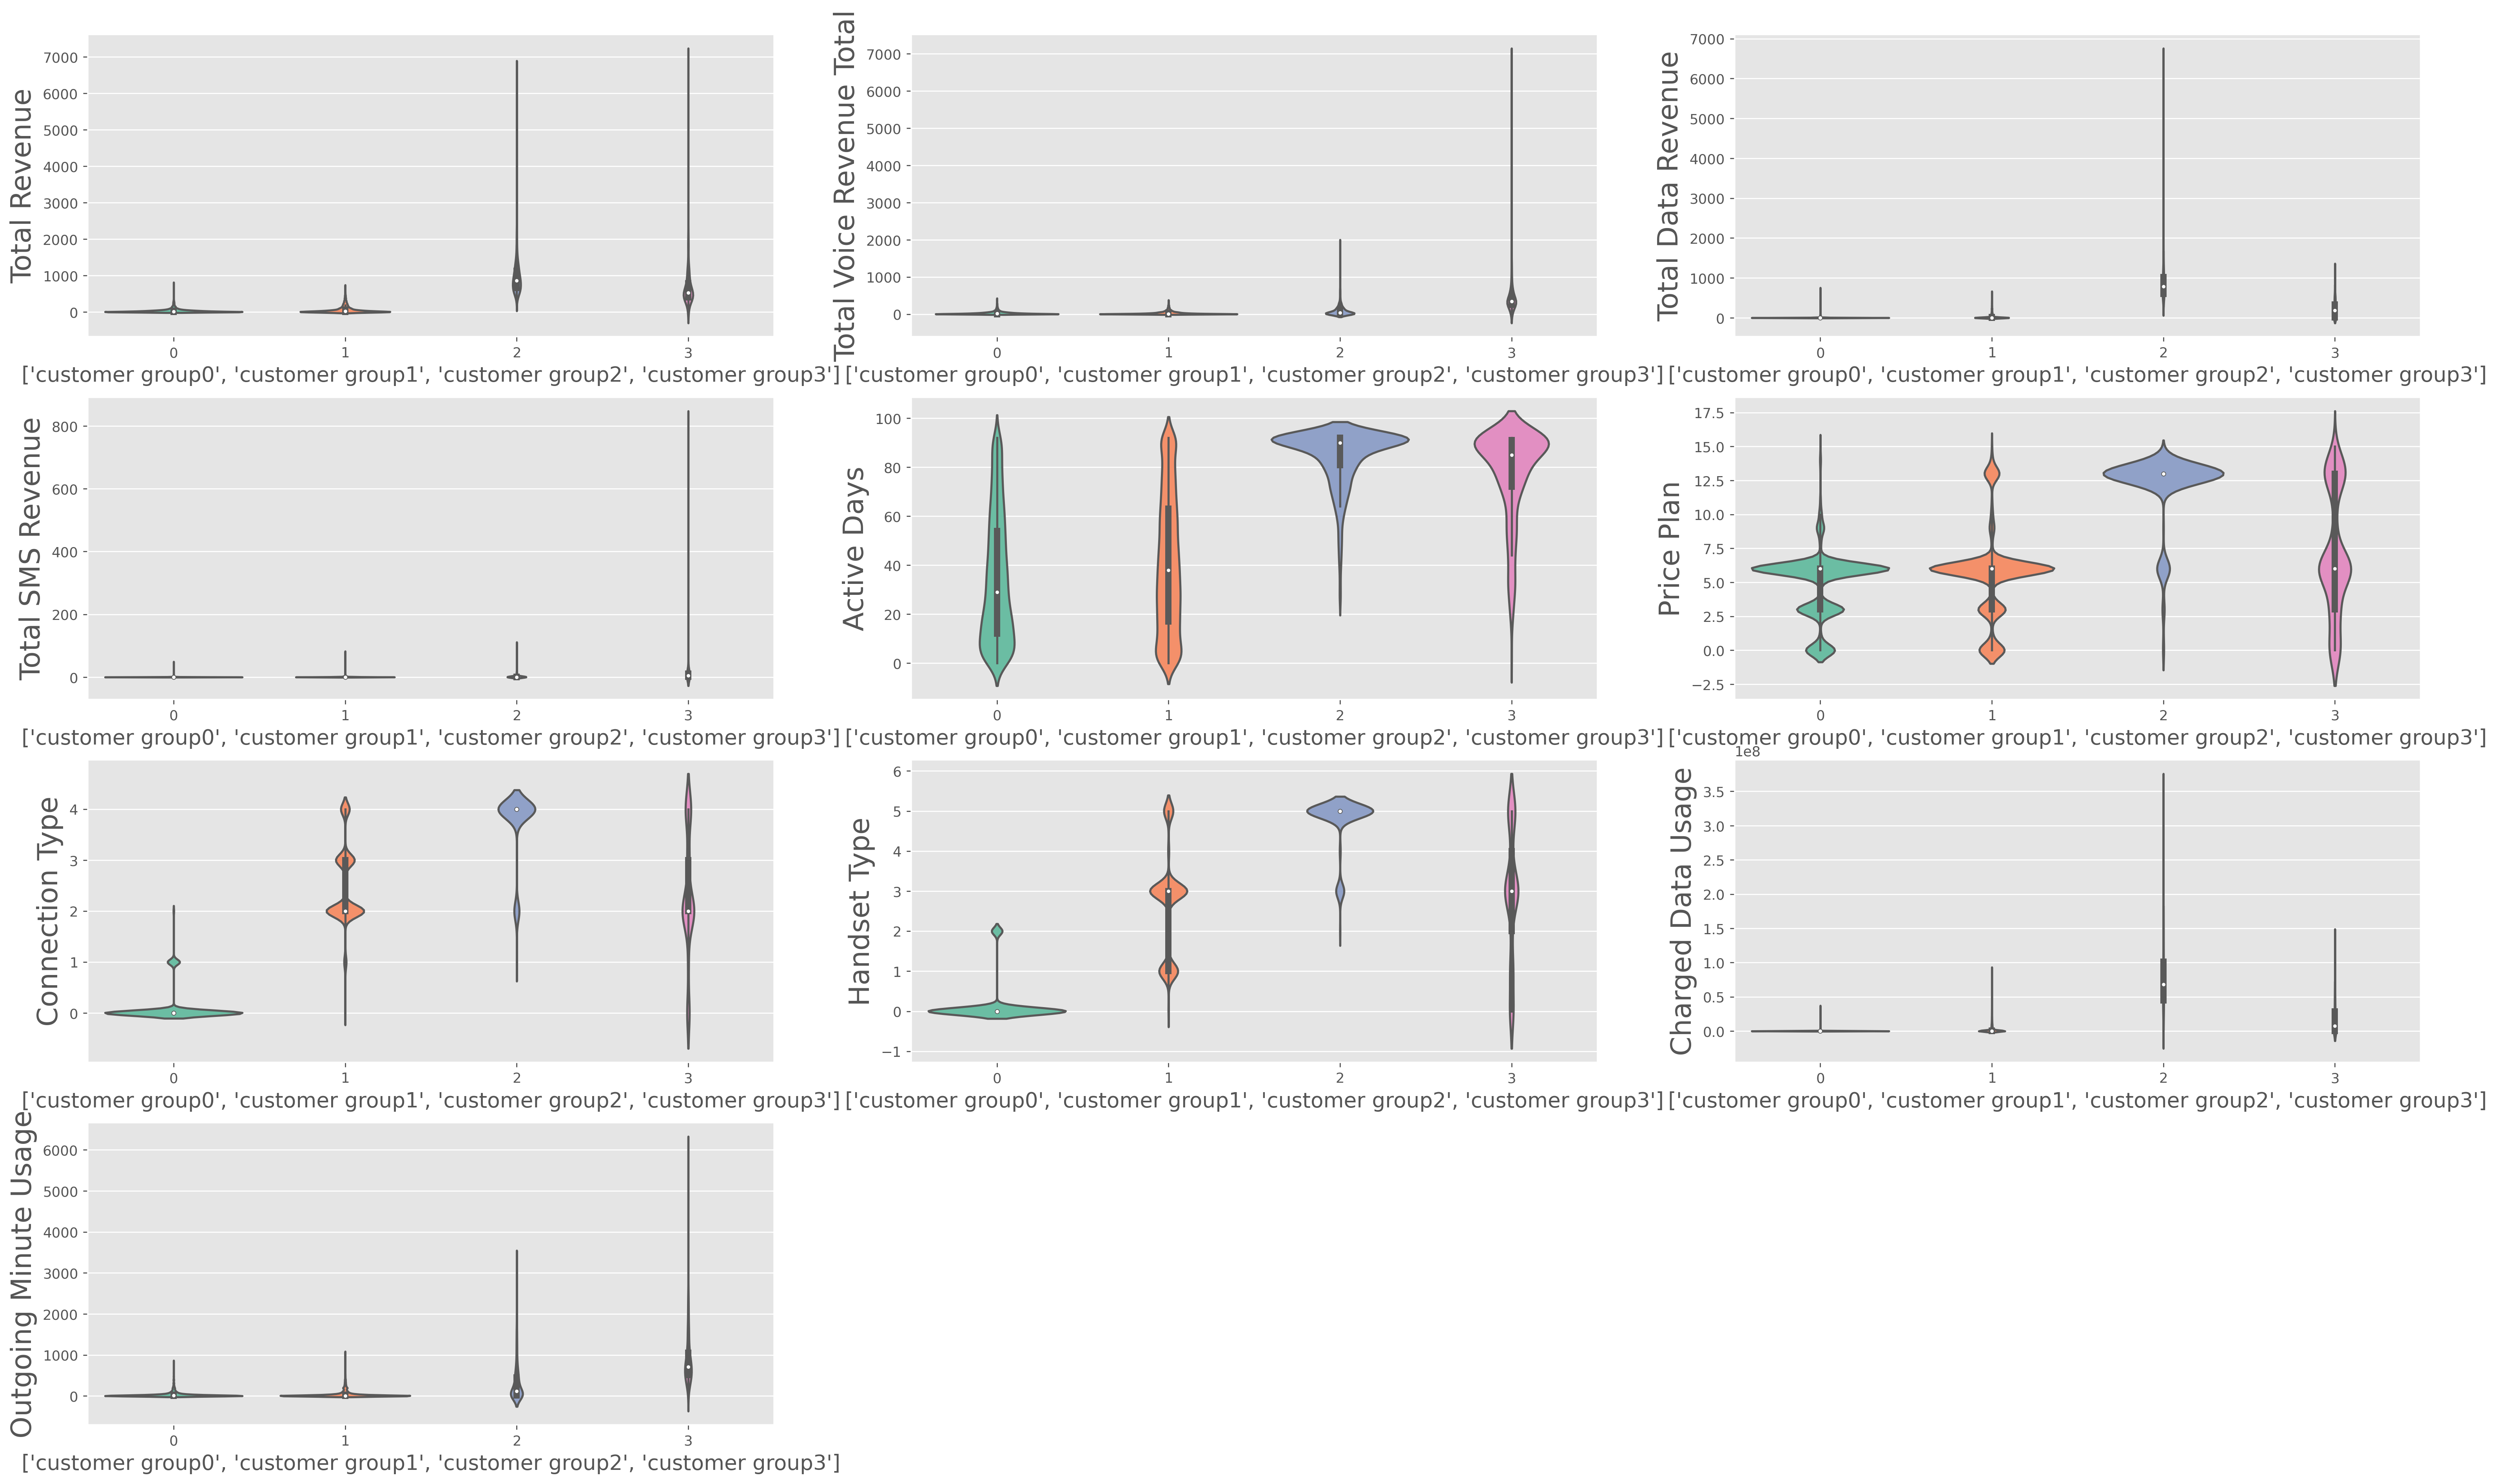

In [11]:
column = data_low_freq_k.columns.tolist()
c=['Total Revenue','Total Voice Revenue Total','Total Data Revenue','Total SMS Revenue','Active Days','Price Plan','Connection Type'
   ,'Handset Type', 'Charged Data Usage', 'Outgoing Minute Usage'] # column names
fig = plt.figure(figsize=(30, 18), dpi=256)  # width and height
 
for i in range(10):
    plt.subplot(4,3, i + 1)  # subplot
    ax = sns.violinplot(x='kind',y=column[i],width=0.8,saturation=0.9,lw=0.8,palette="Set2",orient="v",inner="box",data=data_low_freq_k)
    plt.xlabel((['customer group' + str(i) for i in range(4)]),fontsize=15)
    plt.ylabel(c[i], fontsize=20)
plt.show()
